In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test-images/001_21a7d5e6.jpg')
img.shape

(569, 474, 3)

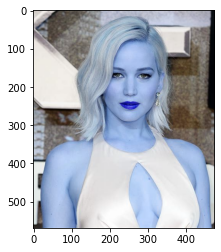

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(569, 474)

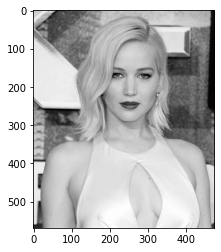

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('.\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('.\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[167, 102, 179, 179]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(167, 102, 179, 179)

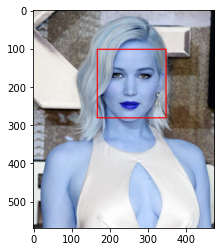

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

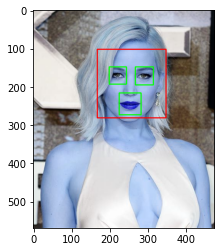

In [9]:
cv2.destroyAllWindows
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap = 'gray')
plt.show()
        

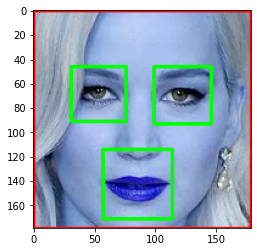

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

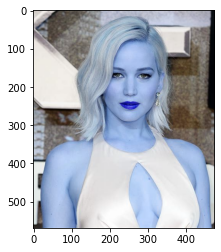

In [12]:
original_img = cv2.imread('./test-images/001_21a7d5e6.jpg')
plt.imshow(original_img)

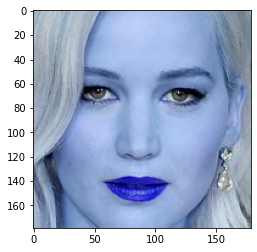

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test-images/001_21a7d5e6.jpg')
plt.imshow(cropped_image)

In [14]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test-images/041_54a9280d.jpg')
cropped_image_no_2_eyes

In [15]:
path_to_data = "./FacesDataset/"
path_to_cr_data = "./FacesDataset/cropped/"

In [16]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./FacesDataset/Jennifer_Lawrence',
 './FacesDataset/Leonardo_DiCaprio',
 './FacesDataset/lionel_messi',
 './FacesDataset/Megan_Fox',
 './FacesDataset/Scarlett_Johansson',
 './FacesDataset/serena_williams',
 './FacesDataset/Tom_Cruise',
 './FacesDataset/Tom_Hanks',
 './FacesDataset/virat_kohli',
 './FacesDataset/Will_Smith']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./FacesDataset/cropped/Jennifer_Lawrence
Generating cropped images in folder:  ./FacesDataset/cropped/Leonardo_DiCaprio
Generating cropped images in folder:  ./FacesDataset/cropped/lionel_messi
Generating cropped images in folder:  ./FacesDataset/cropped/Megan_Fox
Generating cropped images in folder:  ./FacesDataset/cropped/Scarlett_Johansson
Generating cropped images in folder:  ./FacesDataset/cropped/serena_williams
Generating cropped images in folder:  ./FacesDataset/cropped/Tom_Cruise
Generating cropped images in folder:  ./FacesDataset/cropped/Tom_Hanks
Generating cropped images in folder:  ./FacesDataset/cropped/virat_kohli
Generating cropped images in folder:  ./FacesDataset/cropped/Will_Smith


In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [21]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Jennifer_Lawrence': 0,
 'Leonardo_DiCaprio': 1,
 'lionel_messi': 2,
 'Megan_Fox': 3,
 'Scarlett_Johansson': 4,
 'serena_williams': 5,
 'Tom_Cruise': 6,
 'Tom_Hanks': 7,
 'virat_kohli': 8,
 'Will_Smith': 9}

In [22]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [23]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(689, 4096)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel = 'linear',C=200))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.838150289017341

In [26]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.74      0.93      0.82        15
           2       1.00      0.80      0.89         5
           3       0.88      0.88      0.88        25
           4       0.84      0.95      0.89        43
           5       1.00      0.25      0.40         8
           6       0.83      0.79      0.81        19
           7       0.78      0.70      0.74        10
           8       1.00      1.00      1.00         6
           9       0.72      0.87      0.79        15

    accuracy                           0.84       173
   macro avg       0.87      0.80      0.81       173
weighted avg       0.85      0.84      0.83       173



In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [28]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [29]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.777054,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.507786,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.763574,{'logisticregression__C': 10}


In [30]:
best_estimators['svm'].score(X_test,y_test)

0.838150289017341

In [31]:
best_estimators['random_forest'].score(X_test,y_test)

0.5549132947976878

In [32]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.815028901734104

In [33]:
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[21,  1,  0,  0,  4,  0,  1,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0, 22,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 41,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  1,  1,  2,  2,  0,  0,  1],
       [ 1,  0,  0,  0,  2,  0, 15,  0,  0,  1],
       [ 0,  2,  0,  1,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

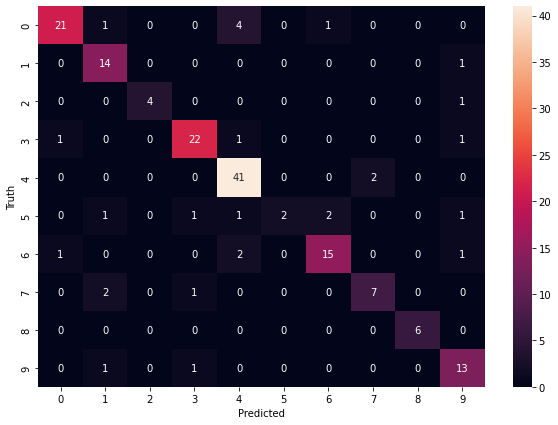

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
class_dict

{'Jennifer_Lawrence': 0,
 'Leonardo_DiCaprio': 1,
 'lionel_messi': 2,
 'Megan_Fox': 3,
 'Scarlett_Johansson': 4,
 'serena_williams': 5,
 'Tom_Cruise': 6,
 'Tom_Hanks': 7,
 'virat_kohli': 8,
 'Will_Smith': 9}

In [36]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [37]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))